# Project Introduction

This project simulates a hypothetical scenario of a Fitness Coach supplying us with a client's annual nutrition information (as a Microsoft Excel file).

The coach has asked us to prepare this data with the eventual goal of creating a "2021 Nutrition Year in Review" Viz Dashboard.

They want to use as much recorded information as possible and also to create a few extra columns described as...
1. "Weekly Average Weight" : The average weight of each week (every 7 days starting from the first recorded date). Rounded to one decimal place.
2. "Net Weight Change" : The difference between the current and previous weeks average weights. Rounded to two decimal places.
3. "Calorie Adherence" : The result of dividing actual calories and goal calories per day. On a scale of 0 to 10.
4. "Protein Adherence" : The result of dividing actual protein and goal protein per day. On a scale of 0 to 10.
5. "Fat Adherence" : The result of dividing actual fats and goal fats per day. On a scale of 0 to 10.
6. "Carbs Adherence" : The result of dividing actual carbs and goal carbs per day. On a scale of 0 to 10.
7. "Calorie Difference": The kcal difference between actual calories and goal calories.
8. "Protein Difference" : The gram difference between actual protein and goal protein.
9. "Fats Difference" : The gram difference between actual fats and goal fats.
10. "Carbs Difference": The gram difference between actual carbs and goal carbs.

# General Plan

To accomplish this goal we will need to perform two major steps...
1. Data Cleaning
    * Identify and handle duplicate rows
    * Identify and handle missing data
    * Resolve inconsistent formatting
    * Recast column data types if necessary
2. Feature Engineering
    * Use the existing data to create all additional columns specified by the coach.

# Exploratory Data Analysis

In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading our raw data
raw_data = pd.read_excel("2021 Nutrition Data (RAW).xlsx")

In [3]:
# Making a copy of our raw data so we can clean without worries
copy_data = raw_data.copy(deep=True)

In [4]:
# Taking a look at the head of our raw data DataFrame

copy_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
1,NaN,2020-12-28 00:00:00,171.4,2011,2050,171,200,36,50,162,200,NaN,NaN
2,NaN,2020-12-29 00:00:00,170.8,1897,2050,188,200,32,50,232,200,NaN,NaN
3,NaN,2020-12-30 00:00:00,172.4,2064,2050,177,200,77,50,161,200,NaN,NaN
4,NaN,2020-12-31 00:00:00,171.4,2178,2050,119,200,79,50,238,200,NaN,NaN


Before going further, there seems to be a discrepancy with our column names. We will keep that in mind as we continue.

In [5]:
# Getting a general overview of our raw data

copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   372 non-null    object 
 2   Unnamed: 2   345 non-null    object 
 3   Unnamed: 3   364 non-null    object 
 4   Unnamed: 4   372 non-null    object 
 5   Unnamed: 5   364 non-null    object 
 6   Unnamed: 6   372 non-null    object 
 7   Unnamed: 7   364 non-null    object 
 8   Unnamed: 8   372 non-null    object 
 9   Unnamed: 9   364 non-null    object 
 10  Unnamed: 10  372 non-null    object 
 11  Unnamed: 11  98 non-null     object 
 12  Unnamed: 12  98 non-null     object 
dtypes: float64(1), object(12)
memory usage: 37.9+ KB


After calling .info(), we can confirm a few initial suspicions about our raw data.
1. The column names don't seem to be right (it appears that our correct column names are located in the first data row).
2. The head of our data frame shows us that most of our columns contain numeric data but their respective column datatypes are listed as 'object'. (To visualize these columns properly in the future, we'll need to convert them to the appropriate data types. Recasting to numeric data types will also let us learn more about the data through the .describe() method.)
3. We have some missing values in our data (our data frame has a total of 372 rows but not all columns have a non-null count of 372). To fill these correctly (if necessary) we will need the columns containing numeric data to have the correct data types.

Let's deal with these issues one at a time.

# Cleaning our Data Frame

## Renaming Columns

In [6]:
# Let's fix our column names first

# Setting the column names to the values of the first row
copy_data.columns = copy_data.iloc[0].values

In [7]:
# Checking to see if it worked
copy_data.head()

# It worked so now we can remove the first row since we no longer need it.

,NaN,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
0,NaN,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
1,NaN,2020-12-28 00:00:00,171.4,2011,2050,171,200,36,50,162,200,NaN,NaN
2,NaN,2020-12-29 00:00:00,170.8,1897,2050,188,200,32,50,232,200,NaN,NaN
3,NaN,2020-12-30 00:00:00,172.4,2064,2050,177,200,77,50,161,200,NaN,NaN
4,NaN,2020-12-31 00:00:00,171.4,2178,2050,119,200,79,50,238,200,NaN,NaN


Our columns have been renamed successfully but that first row is still there. We should remove that now.

In [8]:
# Dropping the first row since we made those into column names
copy_data = copy_data.drop(index=0)

In [9]:
# Quickly looking at our new DataFrame

copy_data.head() # Important columns are named correctly

,NaN,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
1,NaN,2020-12-28 00:00:00,171.4,2011,2050,171,200,36,50,162,200,NaN,NaN
2,NaN,2020-12-29 00:00:00,170.8,1897,2050,188,200,32,50,232,200,NaN,NaN
3,NaN,2020-12-30 00:00:00,172.4,2064,2050,177,200,77,50,161,200,NaN,NaN
4,NaN,2020-12-31 00:00:00,171.4,2178,2050,119,200,79,50,238,200,NaN,NaN
5,NaN,2021-01-01 00:00:00,173.2,2015,2050,179,200,31,50,208,200,NaN,NaN


In [10]:
# General info about our new columns

copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 1 to 371
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nan                 0 non-null      float64
 1   Date                371 non-null    object 
 2   Daily Weight (lbs)  344 non-null    object 
 3   Calorie Actual      363 non-null    object 
 4   Calorie Goal        371 non-null    object 
 5   Protein Actual      363 non-null    object 
 6   Protein Goal        371 non-null    object 
 7   Fat Actual          363 non-null    object 
 8   Fat Goal            371 non-null    object 
 9   Carb Actual         363 non-null    object 
 10  Carb Goal           371 non-null    object 
 11  Activity            97 non-null     object 
 12  Duration (minutes)  97 non-null     object 
dtypes: float64(1), object(12)
memory usage: 40.6+ KB


## Dropping Unwanted Columns

If we look at the first column above, named "NaN", we can see that it has a Non-Null Count of 0. This means that the entirety of that column contains missing data. This is likely due to a formatting error in our imported Excel file that carried on into our data frame. 

A column of all missing data serves no purpose to us in relation to our end-goal of visualization (to be safe we want to double check with the coach to confirm that this is infact a useless column - and it is). Therefore, we can remove that column (but keep everything else as they are metrics we do want to visualize).

In [11]:
copy_data.columns

Index([                 nan,               'Date', 'Daily Weight (lbs)',
           'Calorie Actual',       'Calorie Goal',     'Protein Actual',
             'Protein Goal',         'Fat Actual',           'Fat Goal',
              'Carb Actual',          'Carb Goal',           'Activity',
       'Duration (minutes)'],
      dtype='object')

In [12]:
# Dropping the "NaN" column

# copy_data.drop(columns='nan') --> This doesn't work because NaN isn't the real name of our column, it is actually a missing
# value that was propogated up when we renamed our columns as the data in our first row. Since the first column was originally
# empty, the new column name became NaN or 'Not a Number'.

In [13]:
# Dropping the "NaN" column with index slicing
copy_data = copy_data.loc[:,'Date':] # grabbing every row of our data frame and all columns from 'Date' onwards 

In [14]:
copy_data.head() # Looks better

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
1,2020-12-28 00:00:00,171.4,2011,2050,171,200,36,50,162,200,NaN,NaN
2,2020-12-29 00:00:00,170.8,1897,2050,188,200,32,50,232,200,NaN,NaN
3,2020-12-30 00:00:00,172.4,2064,2050,177,200,77,50,161,200,NaN,NaN
4,2020-12-31 00:00:00,171.4,2178,2050,119,200,79,50,238,200,NaN,NaN
5,2021-01-01 00:00:00,173.2,2015,2050,179,200,31,50,208,200,NaN,NaN


In [15]:
copy_data.info()

# As we can see, the "NaN" column is no longer there and we have a total of 371 rows (the original 372 rows minus the first row
# that we deleted)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 1 to 371
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                371 non-null    object
 1   Daily Weight (lbs)  344 non-null    object
 2   Calorie Actual      363 non-null    object
 3   Calorie Goal        371 non-null    object
 4   Protein Actual      363 non-null    object
 5   Protein Goal        371 non-null    object
 6   Fat Actual          363 non-null    object
 7   Fat Goal            371 non-null    object
 8   Carb Actual         363 non-null    object
 9   Carb Goal           371 non-null    object
 10  Activity            97 non-null     object
 11  Duration (minutes)  97 non-null     object
dtypes: object(12)
memory usage: 37.7+ KB


In [16]:
# Let's quickly reset our index numbers to be from 0 to 370 since we removed that first row.
copy_data = copy_data.reset_index(drop=True)

In [17]:
copy_data

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
0,2020-12-28 00:00:00,171.4,2011,2050,171,200,36,50,162,200,NaN,NaN
1,2020-12-29 00:00:00,170.8,1897,2050,188,200,32,50,232,200,NaN,NaN
2,2020-12-30 00:00:00,172.4,2064,2050,177,200,77,50,161,200,NaN,NaN
3,2020-12-31 00:00:00,171.4,2178,2050,119,200,79,50,238,200,NaN,NaN
4,2021-01-01 00:00:00,173.2,2015,2050,179,200,31,50,208,200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
366,2021-12-29 00:00:00,143.6,2132,2190,137,115,62,49,261,322,NaN,NaN
367,2021-12-30 00:00:00,144.2,2087,2190,172,115,70,49,202,322,NaN,NaN
368,2021-12-31 00:00:00,143.6,1988,2190,93,115,62,49,270,322,NaN,NaN
369,2022-01-01 00:00:00,145.6,2127,2190,145,115,66,49,225,322,Walk,30


Our data frame looks much better now (with our columns renamed, redundant first row and empty column removed, and indexes renumbered). Now we can move on to cleaning out actual data!

# Cleaning our Data

## Identifying and Handling Duplicate Data

Multiple rows that contain the exact same data serve no purpose to us. Once again we would consult with our coach here to confirm that any duplicates can be safely removed. Since this nutrition data is essentially a client recording multiple data points over time, it wouldn't make sense for two rows to contain the exact same data (every row should have a distinct value in the "Date" column).

In [18]:
# Checking for duplicate rows

copy_data.duplicated(keep='first') # for every row in our data frame, this method denotes duplicate rows with 'True'

# It looks like we have no duplicate rows

0      False
1      False
2      False
3      False
4      False
       ...  
366    False
367    False
368    False
369    False
370    False
Length: 371, dtype: bool

In [19]:
copy_data.duplicated(keep='first').value_counts()

# As we can see here, we have 371 counts of False and 0 counts of True. This means our data contains NO duplicate rows.

False    371
dtype: int64

Hypothetically, if our data did contain duplicate rows that we wanted to remove, we could execute:

``` python    
copy_data = copy_data.drop_duplicates(keep='first')
```

which would remove all of them for us automatically.

## Identifying Missing Data

If we eventually want to visualize this data (with the hopes of providing beneficial insights to our coach and their client), we should consider the case of missing data. Similarly to how we removed that "NaN" column before since it contained all missing data (and therefore served no purpose to us), it would be helpful to quantify how much missing data is contained in our other columns as well.

If certain columns contain a large amount of missing data ("large" in this case would be based on the context of this situation and would require discussion with our coach), we might decide to remove those columns as well since they don't provide much beneficial insight for future decisions. 

If we keep the columns with missing data we can either... <br>
(1) leave the data as-is and generate holes in our final visualizations (not necessarily a bad thing at this stage and would be up to our coach's preference) or <br>
(2) fill the missing data by implementing various methods. (Since many of our columns contain numeric data, filling our missing data may require methods that necessitate numeric input so we would need to recast our columns to the appropriate data types first).

For now, let's identify how much missing data each of our columns have and see if there are any columns that can be reasonably removed altogether. After that, we can recast the data types of our remaining columns and implement methods to fill their missing data.

In [20]:
# Finding the number of missing values per column

print("Column\t\tMissing Value Count")
copy_data.isnull().sum().sort_values(ascending=False)

# We can see that 8 columns contain missing values

Column		Missing Value Count


Activity              274
Duration (minutes)    274
Daily Weight (lbs)     27
Calorie Actual          8
Protein Actual          8
Fat Actual              8
Carb Actual             8
Date                    0
Calorie Goal            0
Protein Goal            0
Fat Goal                0
Carb Goal               0
dtype: int64

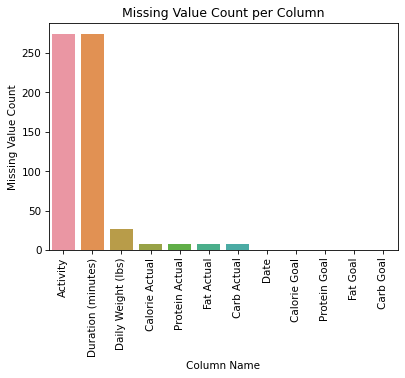

In [21]:
# Visualizing total missing values per column

# Defining our x and y series
missing_data_counts = copy_data.isnull().sum().sort_values(ascending=False)
x = missing_data_counts.index
y = missing_data_counts.values

# Creating our visualization

plt.figure(dpi=75)
sns.barplot(x=x, y=y)
plt.title('Missing Value Count per Column')
plt.xlabel('Column Name')
plt.ylabel('Missing Value Count')
plt.xticks(rotation=90)

plt.show()

In [22]:
# It might be more useful to represent the missing value counts as percentages of the total number of rows in our DataFrame

# Converting the missing value counts to percentages between 0 and 100
missing_data_percent = pd.Series(
    index = missing_data_counts.index,
    data = missing_data_counts.values/371*100)

In [23]:
print("Column\t\tMissing Value Percent")

missing_data_percent

Column		Missing Value Percent


Activity              73.854447
Duration (minutes)    73.854447
Daily Weight (lbs)     7.277628
Calorie Actual         2.156334
Protein Actual         2.156334
Fat Actual             2.156334
Carb Actual            2.156334
Date                   0.000000
Calorie Goal           0.000000
Protein Goal           0.000000
Fat Goal               0.000000
Carb Goal              0.000000
dtype: float64

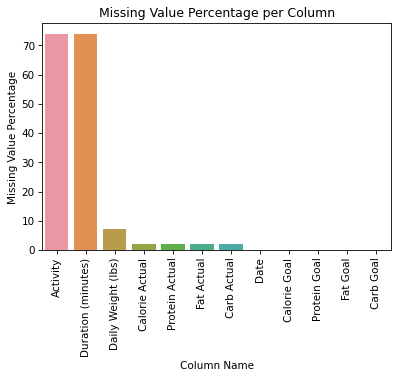

In [24]:
# Visualizing the percentage of missing values per column

plt.figure(dpi=75)
sns.barplot(x=missing_data_percent.index, y=missing_data_percent.values)
plt.title('Missing Value Percentage per Column')
plt.xlabel('Column Name')
plt.ylabel('Missing Value Percentage')
plt.xticks(rotation=90)

plt.show()

We can see that two columns have extremely high missing value percentages (>70%). Following those, we have one column with around 7% missing data and 4 columns with around 2% missing data. Our remaining columns have no missing data.

### Decision: Do We Drop Columns?

The two columns that would be most likely to be dropped are "Activity" and "Duration (minutes)", each having over 70% missing values. However, after consulting with our coach, they explained that these columns provide valuable information about the quantity of additional cardio their client performed each day. "Activity" describes the type of cardio the client did while "Duration (minutes)" describes how long the client did that type of cardio for. Additional daily cardio does have an effect on one's overall energy expenditure therefore the coach desires we keep these columns in.

All other columns contain too valuable information for us to drop. Therefore, we will not be dropping any of our remaining columns.

Since we are not dropping any more columns, our next task is to try filling the missing data where applicable. Since the data contained in our columns are mostly numeric, we will recast their column data types first so we can apply the appropriate methods for filling missing data later on.

## Data Type Recasting

In [25]:
# Viewing our data frame head and current data types again

copy_data.head()

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
0,2020-12-28 00:00:00,171.4,2011,2050,171,200,36,50,162,200,NaN,NaN
1,2020-12-29 00:00:00,170.8,1897,2050,188,200,32,50,232,200,NaN,NaN
2,2020-12-30 00:00:00,172.4,2064,2050,177,200,77,50,161,200,NaN,NaN
3,2020-12-31 00:00:00,171.4,2178,2050,119,200,79,50,238,200,NaN,NaN
4,2021-01-01 00:00:00,173.2,2015,2050,179,200,31,50,208,200,NaN,NaN


In [26]:
copy_data.dtypes

Date                  object
Daily Weight (lbs)    object
Calorie Actual        object
Calorie Goal          object
Protein Actual        object
Protein Goal          object
Fat Actual            object
Fat Goal              object
Carb Actual           object
Carb Goal             object
Activity              object
Duration (minutes)    object
dtype: object

In [27]:
# Date: object --> DateTime
copy_data['Date'] = pd.to_datetime(copy_data['Date'])
copy_data['Date'].head()

0   2020-12-28
1   2020-12-29
2   2020-12-30
3   2020-12-31
4   2021-01-01
Name: Date, dtype: datetime64[ns]

In [28]:
# Daily Weight (lbs) : object --> float
copy_data['Daily Weight (lbs)'] = copy_data['Daily Weight (lbs)'].astype('float64')
copy_data['Daily Weight (lbs)'].head()

0    171.4
1    170.8
2    172.4
3    171.4
4    173.2
Name: Daily Weight (lbs), dtype: float64

**Note:** Originally, I intended to recast the Actual and Goal columns for Calorie, Protein, Fat, and Carbs to Integer data types however, this version of Pandas does not support the existence of missing data in columns with int data types. Therefore, we will convert them to floats for now, handle the missing the data using numeric methods, then convert them to ints if we deem necessary.

In [29]:
# Calorie Actual/Goal, Protein Actual/Goal, Fat Actual/Goal, Carb Actual/Goal : object --> int
copy_data['Calorie Actual'] = copy_data['Calorie Actual'].astype('float64')
copy_data['Calorie Goal'] = copy_data['Calorie Goal'].astype('float64')

copy_data['Protein Actual'] = copy_data['Protein Actual'].astype('float64')
copy_data['Protein Goal'] = copy_data['Protein Goal'].astype('float64')

copy_data['Fat Actual'] = copy_data['Fat Actual'].astype('float64')
copy_data['Fat Goal'] = copy_data['Fat Goal'].astype('float64')

copy_data['Carb Actual'] = copy_data['Carb Actual'].astype('float64')
copy_data['Carb Goal'] = copy_data['Carb Goal'].astype('float64')  

In [30]:
# Since the 'Activity' column is used to provide the name of the type of cardio done on a certain day, we can keep this as the
# 'object' data type.

copy_data['Activity'].value_counts()

Walk    97
Name: Activity, dtype: int64

In [31]:
# Duration (minutes) : object --> float (once we resolve the missing data we can convert this to int)
copy_data['Duration (minutes)'] = copy_data['Duration (minutes)'].astype('float64')

In [32]:
# Inspecting the head of our converted Data Frame
copy_data.head() # Looks slightly different but all necessary information seems to have been retained

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
0,2020-12-28,171.4,2011.0,2050.0,171.0,200.0,36.0,50.0,162.0,200.0,NaN,NaN
1,2020-12-29,170.8,1897.0,2050.0,188.0,200.0,32.0,50.0,232.0,200.0,NaN,NaN
2,2020-12-30,172.4,2064.0,2050.0,177.0,200.0,77.0,50.0,161.0,200.0,NaN,NaN
3,2020-12-31,171.4,2178.0,2050.0,119.0,200.0,79.0,50.0,238.0,200.0,NaN,NaN
4,2021-01-01,173.2,2015.0,2050.0,179.0,200.0,31.0,50.0,208.0,200.0,NaN,NaN


In [33]:
copy_data.info() # columns containing numeric data have been dtype recasted and we are now ready to handle missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                371 non-null    datetime64[ns]
 1   Daily Weight (lbs)  344 non-null    float64       
 2   Calorie Actual      363 non-null    float64       
 3   Calorie Goal        371 non-null    float64       
 4   Protein Actual      363 non-null    float64       
 5   Protein Goal        371 non-null    float64       
 6   Fat Actual          363 non-null    float64       
 7   Fat Goal            371 non-null    float64       
 8   Carb Actual         363 non-null    float64       
 9   Carb Goal           371 non-null    float64       
 10  Activity            97 non-null     object        
 11  Duration (minutes)  97 non-null     float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 34.9+ KB


## Handling Missing Data

In [34]:
# As we prepare to handle the missing data in each column, we will create a method to plot the missing data percentage

def plot_missing_percent():
    
    # Creating our Series of ColumnName:MissingPercent pairs
    missing_data_counts = copy_data.isnull().sum().sort_values(ascending=False)
    missing_data_percent = pd.Series(
        index = missing_data_counts.index,
        data = missing_data_counts.values/len(copy_data)*100)
    
    # Filtering columns that have no missing data
    missing_data_percent = missing_data_percent[missing_data_percent>0]
    
    
    # If we still have columns with missing data, create our plot
    if len(missing_data_percent>0):
        plt.figure()
        sns.barplot(x=missing_data_percent.index, y=missing_data_percent.values)
        plt.title('Missing Value Percentage per Column')
        plt.xlabel('Column Name')
        plt.ylabel('Missing Value Percentage')
        plt.xticks(rotation=90)
        plt.show()
    
    # Else, print a message saying "All missing data has been handled."
    else:
        print("All missing data has been handled.")

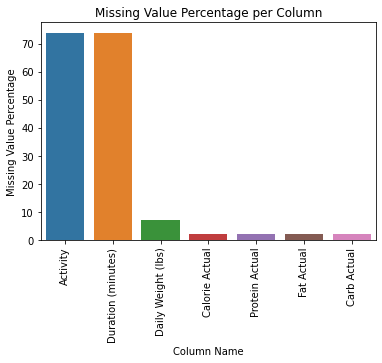

In [35]:
# Testing our method 

plot_missing_percent()

### Activity

In [36]:
# I suspect a missing value in this column corresponds to a missing value in the Duration column as well but let's double check
# to make sure

# Searching for any rows where 'Activity' is null while 'Duration (minutes)' is not null
copy_data[(copy_data['Activity'].isnull()) & (copy_data['Duration (minutes)'].isnull()==False)] # no rows returned

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)


In [37]:
# Searching for any rows where 'Duration (minutes)' is null while 'Activity' is not null
copy_data[(copy_data['Activity'].isnull()==False) & (copy_data['Duration (minutes)'].isnull())] # no rows returned

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)


This means that every time the 'Activity' column has a missing value, the 'Duration (minutes)' column also has a missing value (and vice versa).

In [38]:
# How many distinct values do we have in the 'Activity' column?
copy_data['Activity'].value_counts()

Walk    97
Name: Activity, dtype: int64

In [39]:
# It looks like we only have one distinct value in the 'Activity' column which is 'Walk'. This means that the existence of a
# non-null value in this column just tells us if the client walked that day or not. 

# Option 1: Replace all null values in the 'Activity' column with 'Walk'. We can treat null values in 'Activity' and 'Duration'
# as the client walking for 0 minutes that day. However, if we want to convey this information, it might make more sense to drop
# the 'Activity' column completely and rename 'Duration (minutes)' to something more descriptive for what it conveys such as
# 'Walk Duration (minutes)'. This seems reasonable but the 'Duration (minutes)' column was originally intended to track
# total duration of daily cardio, not just walking. 

# Option 2: To preserve the integrity of the data we were given as much as possible, we can replace null values in the 
# 'Activity' column with a simple string 'None' indicating no additional cardio was performed on that day. This would be
# accompanied with a duration of 0 minutes since we already saw that the two columns are linked in that way.

# We will go with Option 2 as it is the most straightforward way of retaining the information conveyed while still filling the
# missing data.

In [40]:
copy_data['Activity'] = copy_data['Activity'].fillna('None')

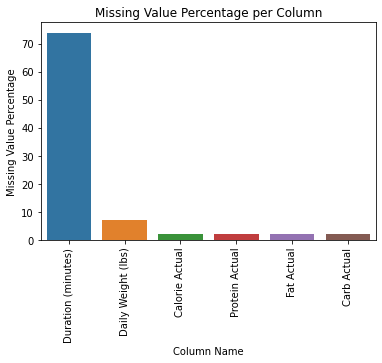

In [41]:
# Seeing if our missing data visualization changed

plot_missing_percent()

### Duration (minutes)

In [42]:
# A missing value in this column implies that no additional cardio was performed on that day (outside of normal activity)
# Therefore, we can fill these missing values with 0.

copy_data['Duration (minutes)'] = copy_data['Duration (minutes)'].fillna(0)

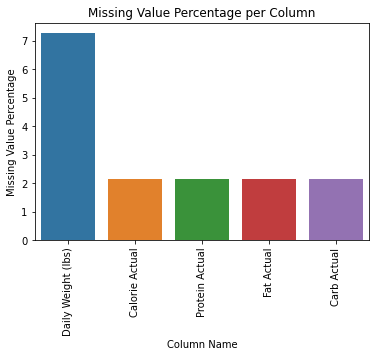

In [43]:
plot_missing_percent()

### Daily Weight (lbs)

In [44]:
# Identifying the number of rows in this column containing missing data
copy_data['Daily Weight (lbs)'].isnull().sum()

27

In [45]:
# Inspecting a few of these rows
copy_data[copy_data['Daily Weight (lbs)'].isnull()].head()

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
21,2021-01-18,NaN,1328.0,1850.0,88.0,175.0,31.0,50.0,168.0,175.0,None,0.0
36,2021-02-02,NaN,1672.0,1730.0,179.0,183.0,31.0,46.0,165.0,146.0,None,0.0
62,2021-02-28,NaN,995.0,1730.0,43.0,183.0,42.0,46.0,113.0,146.0,None,0.0
64,2021-03-02,NaN,1255.0,1730.0,72.0,183.0,36.0,46.0,204.0,146.0,None,0.0
65,2021-03-03,NaN,888.0,1730.0,29.0,183.0,28.0,46.0,128.0,146.0,None,0.0


**Decision:**

We don't want to substitute these values with 0 because that would imply the client weighed 0 lbs on those days (which is not true). Furthermore, we can't substitute a single value into all of these missing data points because it is unlikely the client weighed the same on those days (due to weight change over time and natural daily weight fluctuation).

This means we need to use a mathematical method to extrapolate what these values most likely would have been.

**Option 1:** We can simply leave these values as missing data which would result in holes in our final visualization. This may be acceptable but since this column contains numeric data, it might be possible to approximate these values using a mathematical method.

**Option 2:** We can use propogation to fill these values. The method which would accomplish this is:  
```pd.DataFrame.fillna() ``` with _method_ = 'bfill' or 'ffill'.  
A forward-fill would populate these values with their closest recorded previous weights while a back-fill would populate them with the closest weight recorded after those dates. It is reasonable to expect that one's bodyweight would stay relatively the same within a short timespan but it is highly unlikely that their weight would stay _exactly_ the same even in consecutive days (due to daily hormonal fluctuation, water accumulation, stress, etc.)

**Option 3:** We can use interpolation to fill these values. The method that would accomplish this is:  
```pd.DataFrame.interpolate()``` with _method_ = 'linear', 'quadratic', 'cubic' etc.  
This method would use recorded values surrounding our missing data and attempt to estimate those values as they would fit in a mathematical function. Linear or Polynomial interpolation would succeed in filling our missing values but bodyweight tends to fluctuate up and down a few pounds between consecutive days and it is highly unlikely that many consecutive missing bodyweights would follow such an organized relationship. Additionally, filling these missing values with interpolation would cause our feature engineered 'Weekly Bodyweight' column to be inaccurate.

**Option 4:** Since we know we want to engineer a new column of Weekly Average Bodyweight, we could populate any missing values with the average body weight of that week. This may not be completely accurate but it preserves the long-term trend of bodyweight change over time and retains the calculated average weekly weight which the coach wants to visualize. The main problem with this approach is that the selection of those 7 days is rather arbitrary (starting the week on Sunday would result in a different average weight than starting it on Monday). Unfortunately, this seems like the best option we have given our circumstances and at the very least, if we remain consistent in what day we 'start' the week on, the overall long-term trend of the client's bodyweight will be preserved.

**We will choose Option 4 to fill the missing values in the 'Daily Weight (lbs)' column.**

This means we will wait until we have feature engineered our Average Weekly Weight column then use those values to fill the missing values in this column.

### Calorie Actual

In [46]:
# Inspecting the rows containing missing values in this column

copy_data[copy_data['Calorie Actual'].isnull()]

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes)
48,2021-02-14,170.8,NaN,1730.0,NaN,183.0,NaN,46.0,NaN,146.0,None,0.0
164,2021-06-10,NaN,NaN,1351.0,NaN,165.0,NaN,19.0,NaN,130.0,None,0.0
165,2021-06-11,NaN,NaN,1351.0,NaN,165.0,NaN,19.0,NaN,130.0,None,0.0
166,2021-06-12,NaN,NaN,1351.0,NaN,165.0,NaN,19.0,NaN,130.0,None,0.0
167,2021-06-13,NaN,NaN,1351.0,NaN,165.0,NaN,19.0,NaN,130.0,None,0.0
208,2021-07-24,NaN,NaN,1413.0,NaN,165.0,NaN,21.0,NaN,141.0,None,0.0
209,2021-07-25,NaN,NaN,1413.0,NaN,165.0,NaN,21.0,NaN,141.0,Walk,30.0
216,2021-08-01,151.6,NaN,1318.0,NaN,165.0,NaN,18.0,NaN,124.0,Walk,15.0


Interestingly enough, it seems that whenever the 'Calorie Actual' column contains missing values, so too do the 'Protein Actual', 'Fat Actual', and 'Carb Actual' columns. As we calculated before, all of these columns should contain 8 missing values. Let's double check this.

In [47]:
# The section of our data frame where Calorie Actual contains missing values (only including the four 'Actual' columns)

copy_data[['Calorie Actual', 'Protein Actual', 'Fat Actual', 'Carb Actual']][copy_data['Calorie Actual'].isnull()]

,Calorie Actual,Protein Actual,Fat Actual,Carb Actual
48,NaN,NaN,NaN,NaN
164,NaN,NaN,NaN,NaN
165,NaN,NaN,NaN,NaN
166,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN
208,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN
216,NaN,NaN,NaN,NaN


In [48]:
# How many rows does this slice of our data frame have?

len(copy_data[['Calorie Actual', 'Protein Actual', 'Fat Actual', 'Carb Actual']][copy_data['Calorie Actual'].isnull()])

8

This confirms that all our remaining missing data (in our 'Actual' columns) are located in the exact same rows. As these rows only make up about 2% of our total data frame, it wouldn't be unreasonable to consider dropping these rows to get rid of all the missing data at once.

However, after inspecting those rows more carefully, we see that the values of those rows in the respective 'Goal' columns varied and some of those rows contained Daily Bodyweight data as well as data on additional cardio performed (which we didn't have much of as seen before). This information seems too valuable to lose (at least right now). 

**Decision:**

Since these columns contain numeric data, we can attempt to use mathematical methods to fill the missing data similar to our Daily Bodyweight column.  
<br>
Once again, we wouldn't be able to fill these with 0 nor the same exact values as it is highly unlikely that the client ate the exact same amount of food across those days (especially since the calorie goals changed too). Propogation probably wouldn't work either for the same reasons. We wouldn't be able to use interpolation as food consumption probably doesn't adhere to a neat linear or polynomial function over time.
<br>
Similarly to our decision for the 'Daily Bodyweight (lbs)' column, it seems that using some kind of weekly average would probably be best. (If we inspect the original Excel file, we can see that the nutrition Goals change on a weekly basis but typically remain the same within those weeks. Conveniently, our missing values are never present in consecutive chunks of 7 or more rows so there will at least be some recorded nutrition 'Actual' data within those weeks that we can potentially use to approximate our missing values. Doing so would not alter the long-term nutrition trend either).
<br>

Planning: Double check if the week starts on Sunday or Monday. Use a function to mark every Sunday row. Partition on Sundays, find the average daily weight of that week, and populate a new column with that number. Then use bfill to propagate that to the previous days?

# Feature Engineering

### Weekly Average Weight Change

Note: If I were using SQL to complete this project, I would prefer to use a PARTITION here, as our goal is to separate 7-day chunks of rows starting on Mondays. However, it doesn't seem like Python's Pandas module has a simply ```.partition()``` as I would hope, so we'll have to get creative and look deeper into the [Pandas documentation](https://pandas.pydata.org/docs/) to find a way to accomplish our task. Let's do it!

In [49]:
## Since we want to separate these chunks based on DateTime data, we might be able to use Pandas .Grouper() method

# First let us create a temporary column called "Day Name" so we can make sure we group the dates correctly

copy_data['Day Name'] = copy_data['Date'].dt.day_name()
copy_data[['Date','Day Name']].head() # a quick lookup using a calendar confirms that the method worked

,Date,Day Name
0,2020-12-28,Monday
1,2020-12-29,Tuesday
2,2020-12-30,Wednesday
3,2020-12-31,Thursday
4,2021-01-01,Friday


In [50]:
# We want our 7-day partitions to start on Monday and end on Sunday

copy_data[['Date','Day Name','Daily Weight (lbs)']]\
    .groupby(pd.Grouper(key="Date", freq="W"))\
    .agg({
        'Day Name' : [lambda x : "{} --> {}".format(x.iloc[0],x.iloc[-1])], 
        'Daily Weight (lbs)' : ['mean']
    })\
    .reset_index()\
    .head(10) # putting this here after writing the below comments to reduce final display size

# In the data frame returned by this code execution we have the 'Day Name' column displaying how the dates are separated.
# The first day is the start of each section while the second day is the end of each section. Since every value in this column
# is 'Monday --> Sunday', we know the partionining worked as intended.

# For our 'Daily Weight (lbs)' column, we see the calculated average of the recorded daily weights within each section.

# The 'Date' column displays the last date in each partition.

# It looks like we were able to calculate the average weights successfully. Now we just need to transfer these averages to our
# copy_data DataFrame. We can merge this DataFrame with copy_data on those dates to record the average weight for each week 
# (on only the last day) and then possibly use backfill propagation to just copy those weights onto the other days of the 
# same weeks (if we want).

,Date,Day Name,Daily Weight (lbs)
,,<lambda>,mean
0,2021-01-03,Monday --> Sunday,172.000000
1,2021-01-10,Monday --> Sunday,171.971429
2,2021-01-17,Monday --> Sunday,171.714286
3,2021-01-24,Monday --> Sunday,172.133333
4,2021-01-31,Monday --> Sunday,171.085714
5,2021-02-07,Monday --> Sunday,171.200000
6,2021-02-14,Monday --> Sunday,170.114286
7,2021-02-21,Monday --> Sunday,169.314286
8,2021-02-28,Monday --> Sunday,168.100000


In [53]:
# Let's save the result from above as a separate DataFrame so we can merge with copy_data

# We don't need that Day Name column in this df so we can keep that out and clean up the aggregation by just using .mean()
# We'll also make this a deep copy so the returned DataFrame is a completely new one and not just a view of copy_data

partitioned_weight_df = copy_data[['Date','Daily Weight (lbs)']]\
    .copy(deep=True)\
    .groupby(pd.Grouper(key="Date", freq="W"))\
    .mean()\
    .reset_index()\
    .rename(columns={"Daily Weight (lbs)": "Average Weekly Weight (lbs)"}) # renaming this column to avoid confusion

partitioned_weight_df.head()

,Date,Average Weekly Weight (lbs)
0,2021-01-03,172.000000
1,2021-01-10,171.971429
2,2021-01-17,171.714286
3,2021-01-24,172.133333
4,2021-01-31,171.085714


In [54]:
pd.set_option('display.max_rows',None)

In [55]:
# Now all we need to do is merge the newly created partitioned_weight_df and our main DataFrame (copy_data)

copy_data = copy_data.merge(partitioned_weight_df, how='left', on='Date')

Success! We'll hold off on doing a backfill propagation just yet because if we think ahead, creating our 'Net Weight Change (lbs)' column will follow an extremely similar process as the one we just did. Once we create that column, we can propagate both at the same time (if we want).

### Net Weight Change

For this column, we need to calculate the difference between the 'Average Weekly Weight (lbs)' of every week with the one prior. Luckily, we just created that partitioned DataFrame above so we can just add one more column with a rolling difference calculation and merge it to copy_data all the same. Let's do it!

In [57]:
# Checking out the partition DataFrame we just created
partitioned_weight_df.head()

,Date,Average Weekly Weight (lbs)
0,2021-01-03,172.000000
1,2021-01-10,171.971429
2,2021-01-17,171.714286
3,2021-01-24,172.133333
4,2021-01-31,171.085714


In [93]:
# We'll perform an aggregate function on 'Average Weekly Weight (lbs)' which calculates the rolling
# difference of the average weight of one week and the one prior.


# Testing our implementation of .rolling()
partitioned_weight_df.set_index('Date')\
    .rolling(window=2, min_periods=2)\
    .agg({
        'Average Weekly Weight (lbs)' : (lambda x : round(x.iloc[1]-x.iloc[0] , 2))
    })\
    .reset_index()\
    .rename(columns={'Average Weekly Weight (lbs)' : 'Net Weight Change (lbs)'})\
    .head() # adding this after checking if it worked to reduce display size

,Date,Net Weight Change (lbs)
0,2021-01-03,NaN
1,2021-01-10,-0.03
2,2021-01-17,-0.26
3,2021-01-24,0.42
4,2021-01-31,-1.05


In [99]:
# Saving this Data Frame as another deep copy just to be on the safe side.
partitioned_net_df = partitioned_weight_df.set_index('Date')\
    .copy(deep=True)\
    .rolling(window=2, min_periods=2)\
    .agg({
        'Average Weekly Weight (lbs)' : (lambda x : round(x.iloc[1]-x.iloc[0],3))
    })\
    .reset_index()\
    .rename(columns={'Average Weekly Weight (lbs)' : 'Net Weight Change (lbs)'})

partitioned_net_df.head()

,Date,Net Weight Change (lbs)
0,2021-01-03,NaN
1,2021-01-10,-0.029
2,2021-01-17,-0.257
3,2021-01-24,0.419
4,2021-01-31,-1.048


In [101]:
# Finally we can merge with copy_data

copy_data = copy_data.merge(partitioned_net_df, how='left', on='Date')

In [104]:
copy_data.head(20) # Look's good

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes),Day Name,Average Weekly Weight (lbs),Net Weight Change (lbs)
0,2020-12-28,171.4,2011.0,2050.0,171.0,200.0,36.0,50.0,162.0,200.0,None,0.0,Monday,NaN,NaN
1,2020-12-29,170.8,1897.0,2050.0,188.0,200.0,32.0,50.0,232.0,200.0,None,0.0,Tuesday,NaN,NaN
2,2020-12-30,172.4,2064.0,2050.0,177.0,200.0,77.0,50.0,161.0,200.0,None,0.0,Wednesday,NaN,NaN
3,2020-12-31,171.4,2178.0,2050.0,119.0,200.0,79.0,50.0,238.0,200.0,None,0.0,Thursday,NaN,NaN
4,2021-01-01,173.2,2015.0,2050.0,179.0,200.0,31.0,50.0,208.0,200.0,None,0.0,Friday,NaN,NaN
5,2021-01-02,172.4,1964.0,2050.0,187.0,200.0,50.0,50.0,197.0,200.0,None,0.0,Saturday,NaN,NaN
6,2021-01-03,172.4,1824.0,2050.0,119.0,200.0,57.0,50.0,204.0,200.0,None,0.0,Sunday,172.000000,NaN
7,2021-01-04,173.2,2047.0,2050.0,170.0,175.0,73.0,50.0,159.0,225.0,None,0.0,Monday,NaN,NaN
8,2021-01-05,173.2,2022.0,2050.0,170.0,200.0,60.0,50.0,200.0,200.0,None,0.0,Tuesday,NaN,NaN
9,2021-01-06,171.6,1497.0,2050.0,111.0,200.0,46.0,50.0,152.0,200.0,None,0.0,Wednesday,NaN,NaN


### (TEST) Tweened Average Weight (lbs)

In [105]:
copy_data['Tweened Average Weight (lbs)'] = (copy_data['Daily Weight (lbs)'].rolling(window=7,min_periods=1).mean()).round(decimals=2)
copy_data[['Date','Daily Weight (lbs)','Tweened Average Weight (lbs)']].head(10)

,Date,Daily Weight (lbs),Tweened Average Weight (lbs)
0,2020-12-28,171.4,171.40
1,2020-12-29,170.8,171.10
2,2020-12-30,172.4,171.53
3,2020-12-31,171.4,171.50
4,2021-01-01,173.2,171.84
5,2021-01-02,172.4,171.93
6,2021-01-03,172.4,172.00
7,2021-01-04,173.2,172.26
8,2021-01-05,173.2,172.60
9,2021-01-06,171.6,172.49


### Calorie Adherence

In [106]:
copy_data['Calorie Adherence'] = (copy_data['Calorie Actual'] / copy_data['Calorie Goal'] * 10).round(decimals=1)
copy_data[['Date','Calorie Actual','Calorie Goal','Calorie Adherence']].head()

,Date,Calorie Actual,Calorie Goal,Calorie Adherence
0,2020-12-28,2011.0,2050.0,9.8
1,2020-12-29,1897.0,2050.0,9.3
2,2020-12-30,2064.0,2050.0,10.1
3,2020-12-31,2178.0,2050.0,10.6
4,2021-01-01,2015.0,2050.0,9.8


### Calorie Difference (kcals)

In [107]:
copy_data['Calorie Difference (kcals)'] = copy_data['Calorie Actual'] - copy_data['Calorie Goal']
copy_data[['Date','Calorie Actual','Calorie Goal','Calorie Difference (kcals)']].head()

,Date,Calorie Actual,Calorie Goal,Calorie Difference (kcals)
0,2020-12-28,2011.0,2050.0,-39.0
1,2020-12-29,1897.0,2050.0,-153.0
2,2020-12-30,2064.0,2050.0,14.0
3,2020-12-31,2178.0,2050.0,128.0
4,2021-01-01,2015.0,2050.0,-35.0


### Protein Adherence

In [108]:
copy_data['Protein Adherence'] = (copy_data['Protein Actual'] / copy_data['Protein Goal'] * 10).round(decimals=1)
copy_data[['Date','Protein Actual','Protein Goal','Protein Adherence']].head()

,Date,Protein Actual,Protein Goal,Protein Adherence
0,2020-12-28,171.0,200.0,8.6
1,2020-12-29,188.0,200.0,9.4
2,2020-12-30,177.0,200.0,8.8
3,2020-12-31,119.0,200.0,5.9
4,2021-01-01,179.0,200.0,9.0


### Protein Difference (grams)

In [109]:
copy_data['Protein Difference (grams)'] = copy_data['Protein Actual'] - copy_data['Protein Goal']
copy_data[['Date','Protein Actual','Protein Goal','Protein Difference (grams)']].head()

,Date,Protein Actual,Protein Goal,Protein Difference (grams)
0,2020-12-28,171.0,200.0,-29.0
1,2020-12-29,188.0,200.0,-12.0
2,2020-12-30,177.0,200.0,-23.0
3,2020-12-31,119.0,200.0,-81.0
4,2021-01-01,179.0,200.0,-21.0


### Fats Adherence

In [110]:
copy_data['Fat Adherence'] = (copy_data['Fat Actual'] / copy_data['Fat Goal'] * 10).round(decimals=1)
copy_data[['Date','Fat Actual','Fat Goal','Fat Adherence']].head()

,Date,Fat Actual,Fat Goal,Fat Adherence
0,2020-12-28,36.0,50.0,7.2
1,2020-12-29,32.0,50.0,6.4
2,2020-12-30,77.0,50.0,15.4
3,2020-12-31,79.0,50.0,15.8
4,2021-01-01,31.0,50.0,6.2


### Fats Difference (grams)

In [111]:
copy_data['Fat Difference (grams)'] = copy_data['Fat Actual'] - copy_data['Fat Goal']
copy_data[['Date','Fat Actual','Fat Goal','Fat Difference (grams)']].head()

,Date,Fat Actual,Fat Goal,Fat Difference (grams)
0,2020-12-28,36.0,50.0,-14.0
1,2020-12-29,32.0,50.0,-18.0
2,2020-12-30,77.0,50.0,27.0
3,2020-12-31,79.0,50.0,29.0
4,2021-01-01,31.0,50.0,-19.0


### Carbs Adherence

In [112]:
copy_data['Carb Adherence'] = (copy_data['Carb Actual'] / copy_data['Carb Goal'] * 10).round(decimals=1)
copy_data[['Date','Carb Actual','Carb Goal','Carb Adherence']].head()

,Date,Carb Actual,Carb Goal,Carb Adherence
0,2020-12-28,162.0,200.0,8.1
1,2020-12-29,232.0,200.0,11.6
2,2020-12-30,161.0,200.0,8.0
3,2020-12-31,238.0,200.0,11.9
4,2021-01-01,208.0,200.0,10.4


### Carbs Difference (grams)

In [113]:
copy_data['Carb Difference (grams)'] = copy_data['Carb Actual'] - copy_data['Carb Goal']
copy_data[['Date','Carb Actual','Carb Goal','Carb Difference (grams)']].head()

,Date,Carb Actual,Carb Goal,Carb Difference (grams)
0,2020-12-28,162.0,200.0,-38.0
1,2020-12-29,232.0,200.0,32.0
2,2020-12-30,161.0,200.0,-39.0
3,2020-12-31,238.0,200.0,38.0
4,2021-01-01,208.0,200.0,8.0


# Final Touch Ups

In [120]:
# Inspecting our DataFrame after all the cleaning and feature engineering
copy_data.head(20)

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes),Day Name,Average Weekly Weight (lbs),Net Weight Change (lbs),Tweened Average Weight (lbs),Calorie Adherence,Calorie Difference (kcals),Protein Adherence,Protein Difference (grams),Fat Adherence,Fat Difference (grams),Carb Adherence,Carb Difference (grams)
0,2020-12-28,171.4,2011.0,2050.0,171.0,200.0,36.0,50.0,162.0,200.0,None,0.0,Monday,NaN,NaN,171.40,9.8,-39.0,8.6,-29.0,7.2,-14.0,8.1,-38.0
1,2020-12-29,170.8,1897.0,2050.0,188.0,200.0,32.0,50.0,232.0,200.0,None,0.0,Tuesday,NaN,NaN,171.10,9.3,-153.0,9.4,-12.0,6.4,-18.0,11.6,32.0
2,2020-12-30,172.4,2064.0,2050.0,177.0,200.0,77.0,50.0,161.0,200.0,None,0.0,Wednesday,NaN,NaN,171.53,10.1,14.0,8.8,-23.0,15.4,27.0,8.0,-39.0
3,2020-12-31,171.4,2178.0,2050.0,119.0,200.0,79.0,50.0,238.0,200.0,None,0.0,Thursday,NaN,NaN,171.50,10.6,128.0,5.9,-81.0,15.8,29.0,11.9,38.0
4,2021-01-01,173.2,2015.0,2050.0,179.0,200.0,31.0,50.0,208.0,200.0,None,0.0,Friday,NaN,NaN,171.84,9.8,-35.0,9.0,-21.0,6.2,-19.0,10.4,8.0
5,2021-01-02,172.4,1964.0,2050.0,187.0,200.0,50.0,50.0,197.0,200.0,None,0.0,Saturday,NaN,NaN,171.93,9.6,-86.0,9.4,-13.0,10.0,0.0,9.8,-3.0
6,2021-01-03,172.4,1824.0,2050.0,119.0,200.0,57.0,50.0,204.0,200.0,None,0.0,Sunday,172.000000,NaN,172.00,8.9,-226.0,5.9,-81.0,11.4,7.0,10.2,4.0
7,2021-01-04,173.2,2047.0,2050.0,170.0,175.0,73.0,50.0,159.0,225.0,None,0.0,Monday,NaN,NaN,172.26,10.0,-3.0,9.7,-5.0,14.6,23.0,7.1,-66.0
8,2021-01-05,173.2,2022.0,2050.0,170.0,200.0,60.0,50.0,200.0,200.0,None,0.0,Tuesday,NaN,NaN,172.60,9.9,-28.0,8.5,-30.0,12.0,10.0,10.0,0.0
9,2021-01-06,171.6,1497.0,2050.0,111.0,200.0,46.0,50.0,152.0,200.0,None,0.0,Wednesday,NaN,NaN,172.49,7.3,-553.0,5.6,-89.0,9.2,-4.0,7.6,-48.0


In [122]:
# We should drop the "Day Name" column since we won't be needing it anymore
copy_data = copy_data.drop('Day Name', axis=1)

In [125]:
# Let's also round 'Average Weekly Weight (lbs)' and 'Net Weight Change (lbs)' to 2 decimal places to clean things up a bit
copy_data['Average Weekly Weight (lbs)'] = copy_data['Average Weekly Weight (lbs)'].round(decimals=2)
copy_data['Net Weight Change (lbs)'] = copy_data['Net Weight Change (lbs)'].round(decimals=2)

In [127]:
copy_data.head(20)

,Date,Daily Weight (lbs),Calorie Actual,Calorie Goal,Protein Actual,Protein Goal,Fat Actual,Fat Goal,Carb Actual,Carb Goal,Activity,Duration (minutes),Average Weekly Weight (lbs),Net Weight Change (lbs),Tweened Average Weight (lbs),Calorie Adherence,Calorie Difference (kcals),Protein Adherence,Protein Difference (grams),Fat Adherence,Fat Difference (grams),Carb Adherence,Carb Difference (grams)
0,2020-12-28,171.4,2011.0,2050.0,171.0,200.0,36.0,50.0,162.0,200.0,None,0.0,NaN,NaN,171.40,9.8,-39.0,8.6,-29.0,7.2,-14.0,8.1,-38.0
1,2020-12-29,170.8,1897.0,2050.0,188.0,200.0,32.0,50.0,232.0,200.0,None,0.0,NaN,NaN,171.10,9.3,-153.0,9.4,-12.0,6.4,-18.0,11.6,32.0
2,2020-12-30,172.4,2064.0,2050.0,177.0,200.0,77.0,50.0,161.0,200.0,None,0.0,NaN,NaN,171.53,10.1,14.0,8.8,-23.0,15.4,27.0,8.0,-39.0
3,2020-12-31,171.4,2178.0,2050.0,119.0,200.0,79.0,50.0,238.0,200.0,None,0.0,NaN,NaN,171.50,10.6,128.0,5.9,-81.0,15.8,29.0,11.9,38.0
4,2021-01-01,173.2,2015.0,2050.0,179.0,200.0,31.0,50.0,208.0,200.0,None,0.0,NaN,NaN,171.84,9.8,-35.0,9.0,-21.0,6.2,-19.0,10.4,8.0
5,2021-01-02,172.4,1964.0,2050.0,187.0,200.0,50.0,50.0,197.0,200.0,None,0.0,NaN,NaN,171.93,9.6,-86.0,9.4,-13.0,10.0,0.0,9.8,-3.0
6,2021-01-03,172.4,1824.0,2050.0,119.0,200.0,57.0,50.0,204.0,200.0,None,0.0,172.00,NaN,172.00,8.9,-226.0,5.9,-81.0,11.4,7.0,10.2,4.0
7,2021-01-04,173.2,2047.0,2050.0,170.0,175.0,73.0,50.0,159.0,225.0,None,0.0,NaN,NaN,172.26,10.0,-3.0,9.7,-5.0,14.6,23.0,7.1,-66.0
8,2021-01-05,173.2,2022.0,2050.0,170.0,200.0,60.0,50.0,200.0,200.0,None,0.0,NaN,NaN,172.60,9.9,-28.0,8.5,-30.0,12.0,10.0,10.0,0.0
9,2021-01-06,171.6,1497.0,2050.0,111.0,200.0,46.0,50.0,152.0,200.0,None,0.0,NaN,NaN,172.49,7.3,-553.0,5.6,-89.0,9.2,-4.0,7.6,-48.0


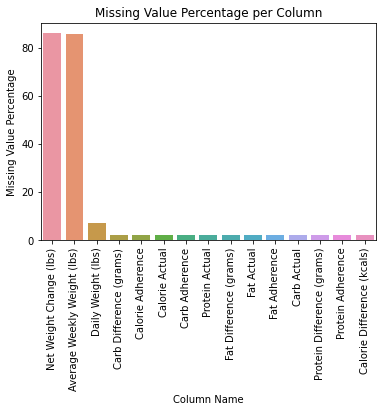

In [128]:
plot_missing_percent()